In [85]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%pylab inline

df=pd.read_csv("HR_comma_sep.csv")

from sklearn.decomposition import PCA



Populating the interactive namespace from numpy and matplotlib


In [5]:

df.describe().T



,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [6]:
df_left = df[df['left']==1]
df_in = df[df['left']==0]


In [7]:
df_left.describe().T


,count,mean,std,min,25%,50%,75%,max
satisfaction_level,3571.0,0.440098,0.263933,0.09,0.13,0.41,0.73,0.92
last_evaluation,3571.0,0.718113,0.197673,0.45,0.52,0.79,0.90,1.00
number_project,3571.0,3.855503,1.818165,2.00,2.00,4.00,6.00,7.00
average_montly_hours,3571.0,207.419210,61.202825,126.00,146.00,224.00,262.00,310.00
time_spend_company,3571.0,3.876505,0.977698,2.00,3.00,4.00,5.00,6.00
Work_accident,3571.0,0.047326,0.212364,0.00,0.00,0.00,0.00,1.00
left,3571.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.00
promotion_last_5years,3571.0,0.005321,0.072759,0.00,0.00,0.00,0.00,1.00


In [8]:
df_in.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,11428.0,0.666810,0.217104,0.12,0.54,0.69,0.84,1.0
last_evaluation,11428.0,0.715473,0.162005,0.36,0.58,0.71,0.85,1.0
number_project,11428.0,3.786664,0.979884,2.00,3.00,4.00,4.00,6.0
average_montly_hours,11428.0,199.060203,45.682731,96.00,162.00,198.00,238.00,287.0
time_spend_company,11428.0,3.380032,1.562348,2.00,2.00,3.00,4.00,10.0
Work_accident,11428.0,0.175009,0.379991,0.00,0.00,0.00,0.00,1.0
left,11428.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.0
promotion_last_5years,11428.0,0.026251,0.159889,0.00,0.00,0.00,0.00,1.0


In [9]:
variable_correlations = df.corr()

variable_correlations

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


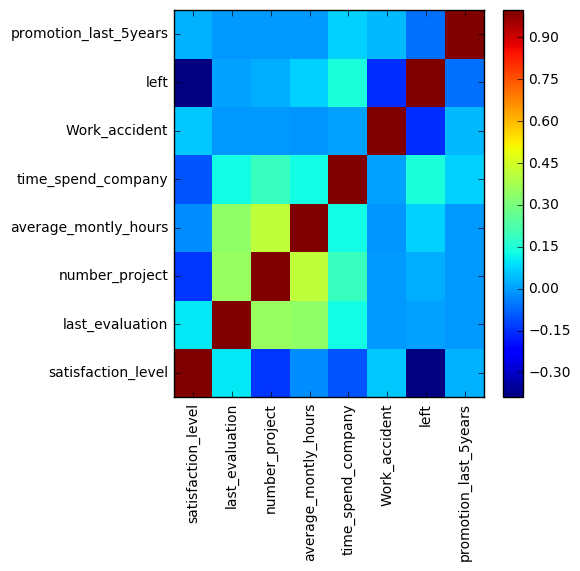

In [10]:
#Heat Map for all data Correlation

plt.subplots(figsize=(5, 5))

plt.pcolor(variable_correlations)
plt.yticks(np.arange(0.5, len(variable_correlations.index), 1), variable_correlations.index)
plt.xticks(np.arange(0.5, len(variable_correlations.columns), 1), variable_correlations.columns)
plt.xticks(rotation=90, size=10)
plt.yticks(size=10)
plt.colorbar();

plt.show()


In [11]:
variable_correlations = df_left.corr()

variable_correlations

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.182295,-0.227113,-0.084117,0.446440,0.005864,NaN,0.005516
last_evaluation,0.182295,1.000000,0.804155,0.830336,0.783873,-0.001875,NaN,-0.047992
number_project,-0.227113,0.804155,1.000000,0.875194,0.601989,-0.008401,NaN,-0.032301
average_montly_hours,-0.084117,0.830336,0.875194,1.000000,0.664011,-0.009048,NaN,-0.035475
time_spend_company,0.446440,0.783873,0.601989,0.664011,1.000000,0.005222,NaN,-0.045888
Work_accident,0.005864,-0.001875,-0.008401,-0.009048,0.005222,1.000000,NaN,0.056214
left,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
promotion_last_5years,0.005516,-0.047992,-0.032301,-0.035475,-0.045888,0.056214,NaN,1.000000


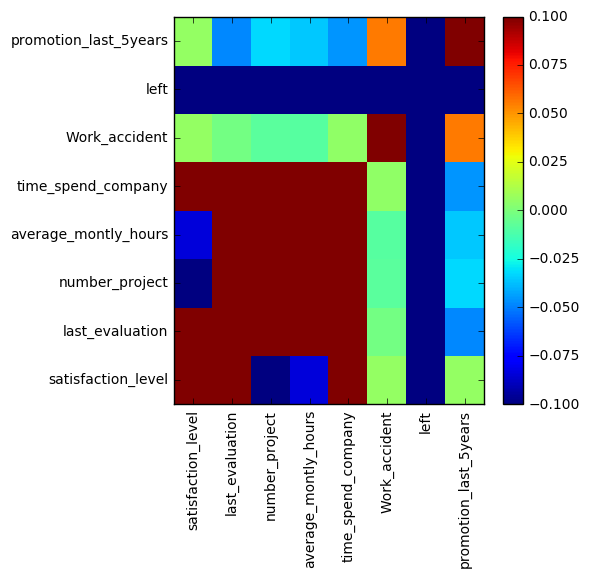

In [12]:


#Heat Map for people that left correlation 

plt.subplots(figsize=(5, 5))

plt.pcolor(variable_correlations)
plt.yticks(np.arange(0.5, len(variable_correlations.index), 1), variable_correlations.index)
plt.xticks(np.arange(0.5, len(variable_correlations.columns), 1), variable_correlations.columns)
plt.xticks(rotation=90, size=10)
plt.yticks(size=10)
plt.colorbar();

plt.show()


In [13]:
#Insights:
#People leaving highly correlated to job satisfaction
#Satisfaction levels of employees that left correlated to high number of hours and high number of projects.



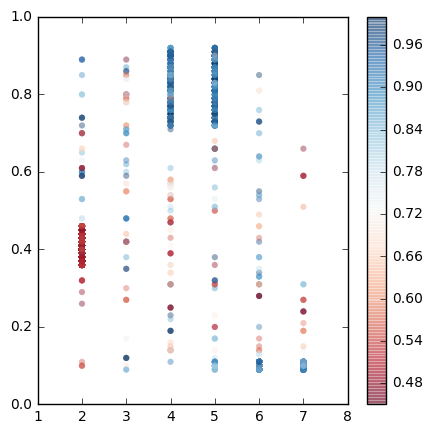

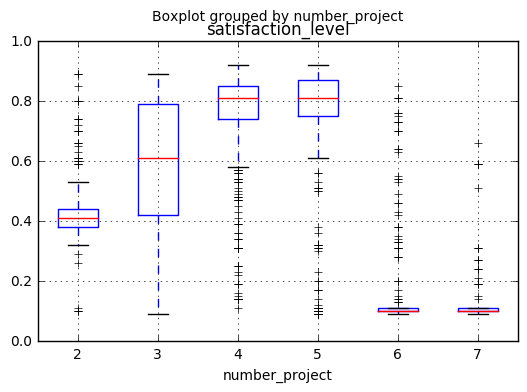

In [41]:
#Plot projects vs satisfaction. color based on on evaluation
figure(figsize=(5,5));
plt.scatter(df_left['number_project'], df_left['satisfaction_level'], c=df_left['last_evaluation'], cmap=cm.RdBu, edgecolor='none', alpha=0.4);
colorbar()
df_left.boxplot(column = 'satisfaction_level', by = 'number_project')

#Insight 3-5 projects is optimal. Good workers are unsatisfied when they are placed in >5 projects

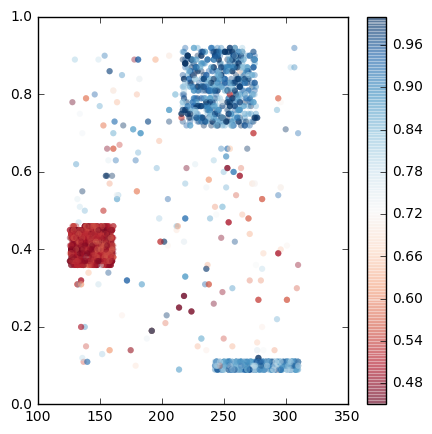

In [26]:
#Plot projects vs satisfaction. color based on on evaluation

figure(figsize=(5,5));
scatter(df_left['average_montly_hours'], df_left['satisfaction_level'], c=df_left['last_evaluation'], cmap=cm.RdBu, edgecolor='none', alpha=0.4);
colorbar()

#Insight: If yor work more than ~250h then your job satisfaction drop significantly. Seems that job performance is linked to how many hours your work.


In [ ]:
#kmeans clustering
figure(figsize=(10,4)); 
ax=subplot(131,aspect='equal')
scatter(X[:,0],X[:,1],c='w');

ax=subplot(132,aspect='equal')
scatter(X[:,0],X[:,1],c=L,cmap=cm.rainbow);
scatter(C[:,0],C[:,1],c='k',marker='o',s=300,alpha=0.5,edgecolor='none');


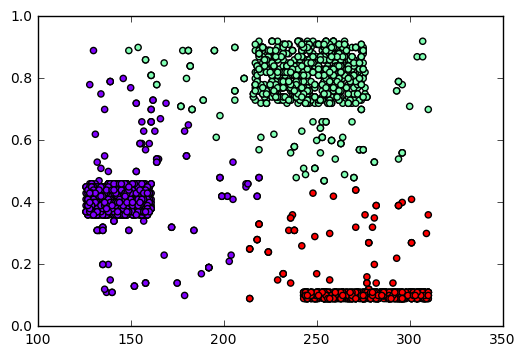

In [90]:
X =pd.concat([df_left['average_montly_hours'], df_left['satisfaction_level']], axis=1)

b = PCA(n_components=2,whiten=True).fit_transform(X)
X = b
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
C, L = kmeans.cluster_centers_, kmeans.labels_

scatter(df_left['average_montly_hours'], df_left['satisfaction_level'],c=L,cmap=cm.rainbow);
#scatter(C[:,0],C[:,1],c='k',marker='o',s=300,alpha=0.5,edgecolor='none');
